In [1]:
import numpy as np

In [6]:
timesteps = 100
input_features = 32
output_features = 64



inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_inputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_inputs.append(output_t)
    state_t = output_t
print(successive_inputs)
print(f'Shape: {len(successive_inputs)}')
final_output_sequence = np.concatenate(successive_inputs, axis=0)

[array([0.99999994, 0.99999998, 0.99999989, 1.        , 0.99999999,
       0.99999999, 0.99999999, 0.99999843, 1.        , 0.99999983,
       0.99999971, 1.        , 0.99999947, 0.99999999, 0.99999998,
       0.99999997, 0.99999999, 0.99999966, 1.        , 0.99999989,
       0.99999989, 0.99999999, 0.99999999, 0.99999997, 0.99999999,
       0.99999999, 1.        , 0.99999998, 0.99999996, 0.99999999,
       0.99999999, 0.99999923, 1.        , 1.        , 0.99999995,
       1.        , 0.99999994, 0.99999882, 1.        , 0.99999991,
       0.9999993 , 0.9999999 , 1.        , 0.99999994, 0.99999997,
       0.99999998, 0.99999997, 1.        , 0.99999999, 0.99999908,
       0.99999987, 0.99999993, 0.9999998 , 1.        , 0.99999995,
       0.99999998, 0.99999994, 0.99999991, 0.99999999, 1.        ,
       0.99999999, 0.99999998, 0.99999989, 0.99999991]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [7]:
final_output_sequence.shape

(6400,)

In [8]:
len(successive_inputs)

100

In [9]:
len(successive_inputs[0])

64

In [10]:
l = [[1,2,3], [4,5,6]]
np.concatenate(l, axis=0)

array([1, 2, 3, 4, 5, 6])

In [13]:
new = successive_inputs.copy()
new = np.asarray(new)

In [14]:
new.shape

(100, 64)

In [17]:
l = np.asarray(l)

In [18]:
l.shape

(2, 3)

In [20]:
np.concatenate(l, axis=0).shape

(6,)

In [21]:
#Simple RNN in Keras that returns only the last timestep

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [22]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Stacking rnns and returning full sequence of outputs at every layer
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [24]:
#using this model on imdb dataset

from keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence

In [25]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading  data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')


Loading  data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [29]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train_shape:', input_train.shape)
print('input_test_shape:', input_test.shape)

input_train_shape: (25000, 500)
input_test_shape: (25000, 500)


In [32]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
             epochs=10,
             batch_size=128,
             validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 94ms/step - loss: 0.6151 - acc: 0.6451 - val_loss: 0.4648 - val_acc: 0.7940
Epoch 2/10
157/157 [==============================] - 14s 90ms/step - loss: 0.3865 - acc: 0.8383 - val_loss: 0.3755 - val_acc: 0.8404
Epoch 3/10
157/157 [==============================] - 14s 90ms/step - loss: 0.2886 - acc: 0.8871 - val_loss: 0.3878 - val_acc: 0.8268
Epoch 4/10
157/157 [==============================] - 14s 90ms/step - loss: 0.2172 - acc: 0.9204 - val_loss: 0.3381 - val_acc: 0.8710
Epoch 5/10
157/157 [==============================] - 14s 90ms/step - loss: 0.1611 - acc: 0.9426 - val_loss: 0.4122 - val_acc: 0.8264
Epoch 6/10
157/157 [==============================] - 14s 90ms/step - loss: 0.1076 - acc: 0.9648 - val_loss: 0.5311 - val_acc: 0.7976
Epoch 7/10
157/157 [==============================] - 14s 89ms/step - loss: 0.0716 - acc: 0.9775 - val_loss: 0.4301 - val_acc: 0.8562
Epoch 8/10
157/157 [==============================] - 14s 90ms

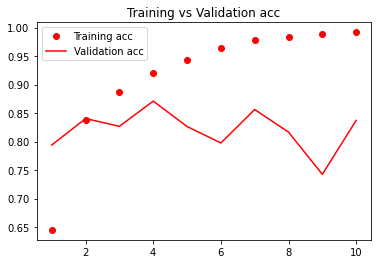

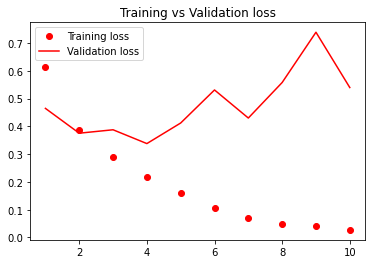

In [37]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training vs Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training vs Validation loss')
plt.legend()

plt.show()

In [38]:
#Using LSTM on the above data to combat vanishing gradient problem - we're still restricting sequences to 500 words
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 205ms/step - loss: 0.5507 - acc: 0.7413 - val_loss: 0.4528 - val_acc: 0.8386
Epoch 2/10
157/157 [==============================] - 32s 203ms/step - loss: 0.3256 - acc: 0.8735 - val_loss: 0.3860 - val_acc: 0.8344
Epoch 3/10
157/157 [==============================] - 32s 204ms/step - loss: 0.2436 - acc: 0.9078 - val_loss: 0.3769 - val_acc: 0.8698
Epoch 4/10
157/157 [==============================] - 32s 207ms/step - loss: 0.2087 - acc: 0.9216 - val_loss: 0.3518 - val_acc: 0.8760
Epoch 5/10
157/157 [==============================] - 32s 204ms/step - loss: 0.1795 - acc: 0.9351 - val_loss: 0.2861 - val_acc: 0.8920
Epoch 6/10
157/157 [==============================] - 32s 202ms/step - loss: 0.1588 - acc: 0.9444 - val_loss: 0.2899 - val_acc: 0.8890
Epoch 7/10
157/157 [==============================] - 32s 201ms/step - loss: 0.1391 - acc: 0.9510 - val_loss: 0.4135 - val_acc: 0.8804
Epoch 8/10
157/157 [==============================] - 3

In [40]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 30s 38ms/step - loss: 0.3670 - acc: 0.8628


[0.3670112192630768, 0.8628000020980835]

In [ ]:
model.predict()

In [41]:
input_test.shape

(25000, 500)

In [108]:
#review = ['Theres no illusion of reality here, no detachment from the storyteller and the story. In every single moment of The Wonderful Story of Henry Sugar, we are reminded that this is a product of human imagination, brought into being by human hands.']

#review = ['This is one of the best films ever made. I love the direction, comedy, music and photography. Easily a 10/10']
#review = ['I hate this movie. Its the worst one ever. Never watching movies of this actor again.']
review = ['This movie could have been made so well but the ending was really bad.']

In [44]:
from keras.preprocessing.text import Tokenizer

In [109]:
maxlen=500
max_features=10000

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(review)

In [110]:
sequences = tokenizer.texts_to_sequences(review)

In [111]:
input_review = sequence.pad_sequences(sequences, maxlen=maxlen)

In [112]:
input_review

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [113]:
model.predict(input_review)

1/1 [==============================] - 0s 40ms/step


array([[0.65979844]], dtype=float32)

In [106]:
model(input_review)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.57332957]], dtype=float32)>

In [107]:
model.predict_classes(input_review)

AttributeError: 'Sequential' object has no attribute 'predict_classes'